In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Processing on cwur_data

## 1. Read the Relevant Files

In [195]:
# The Center for World University Rankings Data
cwur_Data = pd.read_csv('../Data/UniRanking/cwurData.csv')
# Education Expenditure
education_expenditure = pd.read_csv(open('../Data/UniRanking/education_expenditure_supplementary_data.csv', "r"), sep=",")
# World Bank Data
world_data = pd.read_csv(open('../Data/UniRanking/World_Bank_Data.csv', "r", encoding="utf-8"), sep=",")

## 2. Take only relevant and required columns from World Data 

In [80]:
world_data = world_data[["name", "alpha-3", "region", "sub-region"]].rename(
    columns={"name": "country", "alpha-3": "ISO_Code"}
)
world_data

,country,ISO_Code,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WLF,Oceania,Polynesia
245,Western Sahara,ESH,Africa,Northern Africa
246,Yemen,YEM,Asia,Western Asia
247,Zambia,ZMB,Africa,Sub-Saharan Africa


## 4. Handle missing values in cwur_Data file

### 4.1. Check cwur_data dataset information 

In [114]:
print(cwur_Data.info())
print(cwur_Data.isnull().sum())
#cwur_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2200 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None
world_r

### 4.2 Check the "broad_impact" column for missing values

In [91]:
print(cwur_Data['broad_impact'].isnull().sum())

missing_rows = cwur_Data[cwur_Data['broad_impact'].isna()]
missing_rows.head()

#this is just to validate data with some university
#tempRow = cwur_Data[cwur_Data['institution'] == 'Harvard University' ]
#tempRow
#tempRow = cwur_Data[cwur_Data['institution'].isin(['University of Helsinki','Harvard University']) ].sort_values(by='institution')
#tempRow

199


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### 4.3 Replace missing values of "broad_impact" with mean for each "institution"

In [92]:
#Calculate mean by university from year
mean_values = cwur_Data.groupby('institution')['broad_impact'].transform('mean')

#fill missing value
cwur_Data['broad_impact'] = cwur_Data['broad_impact'].fillna(mean_values)

#print(cwur_Data['broad_impact'].isnull().sum())

In [93]:
missing_rows = cwur_Data[cwur_Data['broad_impact'].isna()]
#print(missing_rows)

In [94]:
# Directly assign the value 0 to 'broad_impact' for 'Williams College' as it is not working with generically
cwur_Data.loc[cwur_Data['institution'] == 'Williams College', 'broad_impact'] = 0

In [118]:
print(cwur_Data['broad_impact'].isnull().sum())

#this is just to validate data with some university

#tempRow = cwur_Data[cwur_Data['institution'] == 'Harvard University' ]
#tempRow
#tempRow = cwur_Data[cwur_Data['institution'].isin(['University of Helsinki','Harvard University']) ].sort_values(by='institution')
#tempRow

0


In [119]:
cwur_Data
#print(cwur_Data.info())

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,United States,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,United States,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,24.5,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


## 5. Preprocessing of data to match the countries from 'cwur_Data' file with 'world_data' file.

### 5.1 Check the comumns from both cwur_data and world_data

In [103]:
print(cwur_Data.columns)
print(world_data.columns)

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')
Index(['country', 'ISO_Code', 'region', 'sub-region'], dtype='object')


### 5.2 Check the mismatched countries in cwur_Data from world_data

In [104]:
# Inspect unique country names
cwur_countries = set(cwur_Data['country'].unique())
world_countries = set(world_data['country'].unique())

# Identify mismatched country names
mismatched_countries = cwur_countries - world_countries
print("Mismatched Countries:", mismatched_countries)

Mismatched Countries: set()


### 5.3 Mapping for mismatch countries to align with standard world_data

In [105]:
# Create a mapping dictionary for mismatches
country_mapping = {
    "United States": "USA",
    "Slovakia": "Slovak Republic"
}
country_mapping = {
    "USA": "United States",
    "Slovak Republic": "Slovakia"
}
# Replace mismatched values in `cwur_data`
cwur_Data['country'] = cwur_Data['country'].replace(country_mapping)

In [106]:
# Normalize case and whitespace to ensures consistency
cwur_Data['country'] = cwur_Data['country'].str.strip().str.title()
world_data['country'] = world_data['country'].str.strip().str.title()

# Verify alignment
aligned_countries = set(cwur_Data['country'].unique()) - set(world_data['country'].unique())
print("Unresolved Countries:", aligned_countries)

Unresolved Countries: set()


In [122]:
cwur_Data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,United States,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,United States,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,24.5,18,85.21,2012


## 6. Merge both cwur_Data and world_data

In [110]:
# Merging cwur_Data and world_data on the 'country' column
cwur_world_merged = pd.merge(cwur_Data, world_data, on='country', how='inner')
cwur_world_merged.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,ISO_Code,region,sub-region
0,1,Harvard University,United States,1,7,9,1,1,1,1,1.0,5,100.00,2012,USA,Americas,Northern America
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,2.0,1,91.67,2012,USA,Americas,Northern America
2,3,Stanford University,United States,3,17,11,5,4,2,2,4.0,15,89.50,2012,USA,Americas,Northern America
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012,GBR,Europe,Northern Europe
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,24.5,18,85.21,2012,USA,Americas,Northern America


## 7. Visualization of different factors

### 7.1. Top 10 countries with number of universities 

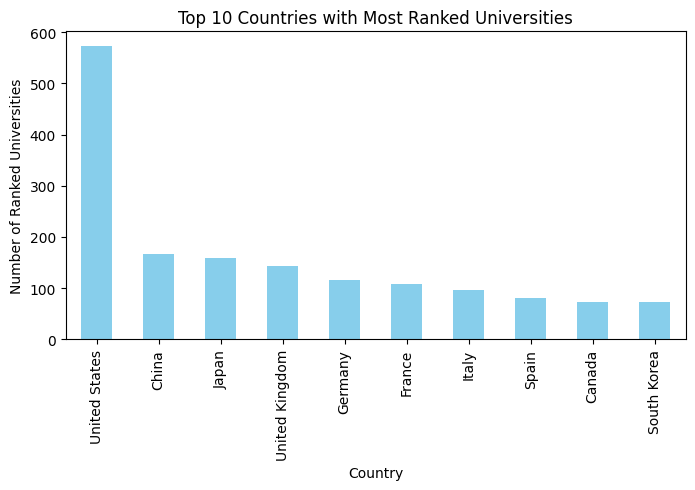

In [23]:
ranked_universities = cwur_world_merged['country'].value_counts().head(10)
ranked_universities.plot(kind='bar', figsize=(8, 4), color='skyblue', title='Top 10 Countries with Most Ranked Universities')
plt.ylabel('Number of Ranked Universities')
plt.xlabel('Country')
plt.show()


### 7.2 Universities per Region

     region  count
3    Europe    826
1  Americas    708
2      Asia    576
4   Oceania     70
0    Africa     20


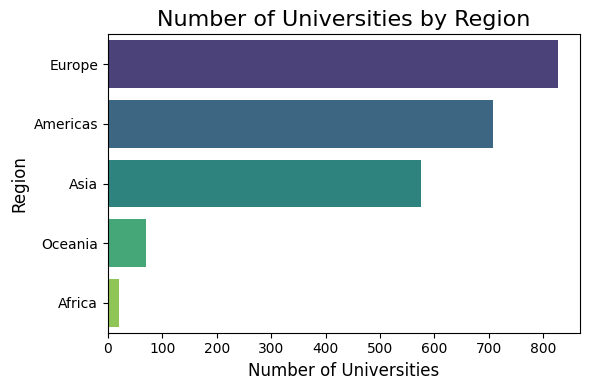

In [141]:
# Group by 'region' and count the number of institutions
universities_per_region = cwur_world_merged.groupby('region').size().reset_index(name='count')

# Sort the results in descending order for better readability
universities_per_region = universities_per_region.sort_values(by='count', ascending=False)
print(universities_per_region)

# Bar plot for universities per region
plt.figure(figsize=(6, 4))
sns.barplot(data=universities_per_region, x='count', y='region', hue='region', palette='viridis')
plt.title('Number of Universities by Region', fontsize=16)
plt.xlabel('Number of Universities', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

### 7.3 Top 10 institutions by rank

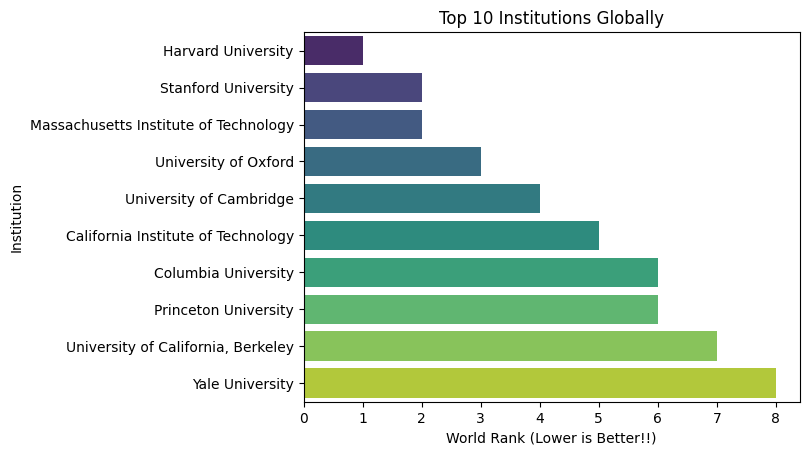

In [142]:
# Top 10 institutions by rank
top_institutions = (
    cwur_world_merged.sort_values('world_rank')
    .drop_duplicates(subset='institution')
    .nsmallest(10, 'world_rank')
)

# Plot the data
sns.barplot(data=top_institutions, x='world_rank', y='institution', hue='institution', palette='viridis', legend=False)
plt.title('Top 10 Institutions Globally')
plt.xlabel('World Rank (Lower is Better!!)')
plt.ylabel('Institution')
plt.show()

## 7.4 Publications by Regions

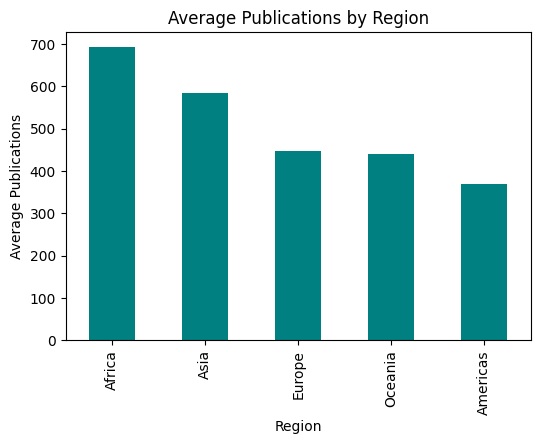

In [143]:
# Regional Performance in Research

# Average publications by region
region_publications = cwur_world_merged.groupby('region')['publications'].mean().sort_values(ascending=False)
region_publications.plot(kind='bar', figsize=(6, 4), color='teal', title='Average Publications by Region')
plt.ylabel('Average Publications')
plt.xlabel('Region')
plt.show()

### 7.5 Quality of Education by Region

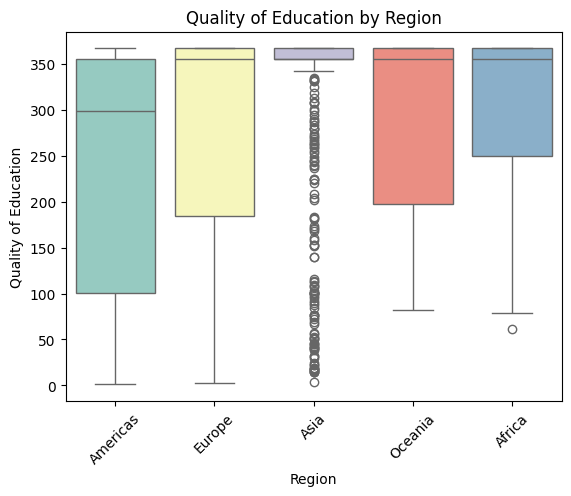

In [144]:
# Comparing quality_of_education by region
sns.boxplot(data=cwur_world_merged, x='region', y='quality_of_education', hue='region', palette='Set3')
plt.title('Quality of Education by Region')
plt.ylabel('Quality of Education')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


### 7.6 Trends in World Rankings for Top-10 Universities Over the Years

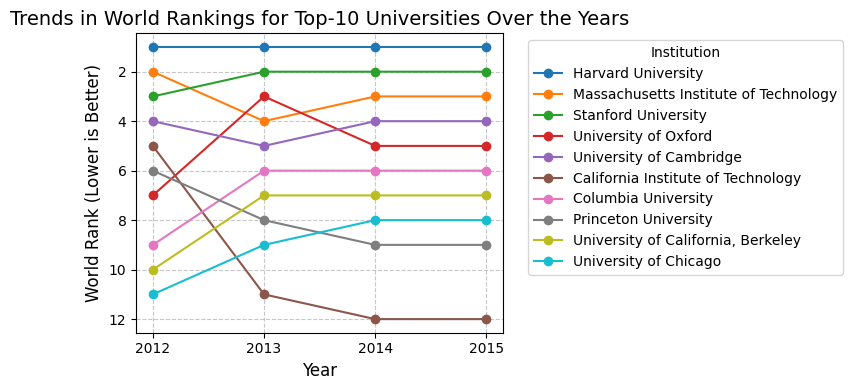

In [146]:
# Filter the Top-10 universities based on their best world rankings
top_10_universities = cwur_world_merged.groupby('institution')['world_rank'].min().nsmallest(10).index
top_10_data = cwur_world_merged[cwur_world_merged['institution'].isin(top_10_universities)]

# Create the line plot
plt.figure(figsize=(8, 4))
for institution in top_10_universities:
    institution_data = top_10_data[top_10_data['institution'] == institution]
    plt.plot(institution_data['year'], institution_data['world_rank'], marker='o', label=institution)

# Customize the plot
plt.gca().invert_yaxis()  # Invert y-axis since lower ranks are better
plt.xticks(sorted(top_10_data['year'].unique())) # to show only availabe values
plt.title('Trends in World Rankings for Top-10 Universities Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('World Rank (Lower is Better)', fontsize=12)
plt.legend(title='Institution', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 7.7 Number of Patents by Top 10 Universities

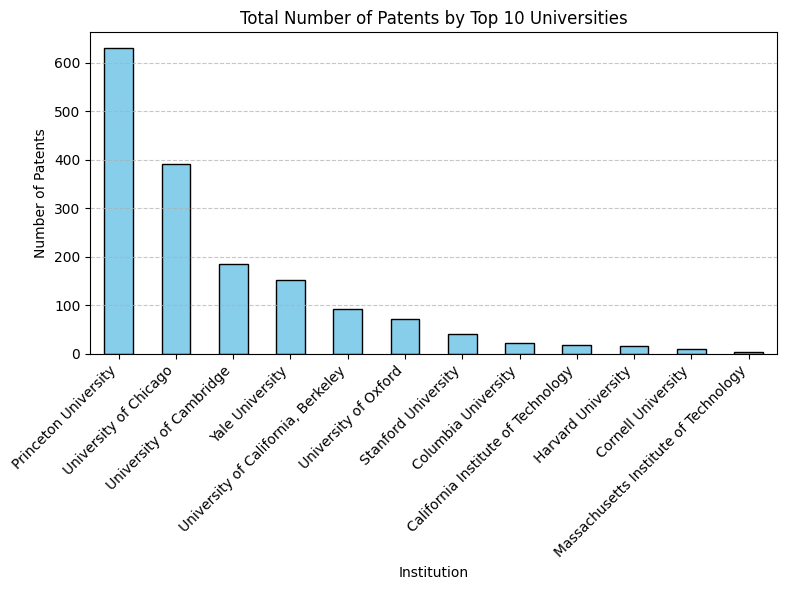

In [147]:
## Number of Patents done by top 10 universities

# Filter data for the top 10 universities based on world rank
top_10_universities = cwur_world_merged[cwur_world_merged['world_rank'] <= 10]

# Calculate the total number of patents for each university
top_10_patents = top_10_universities.groupby('institution')['patents'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
top_10_patents.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Number of Patents by Top 10 Universities', fontsize=12)
plt.xlabel('Institution', fontsize=10)
plt.ylabel('Number of Patents', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7.8 Interactive Choropleth Map with number of institution in each country

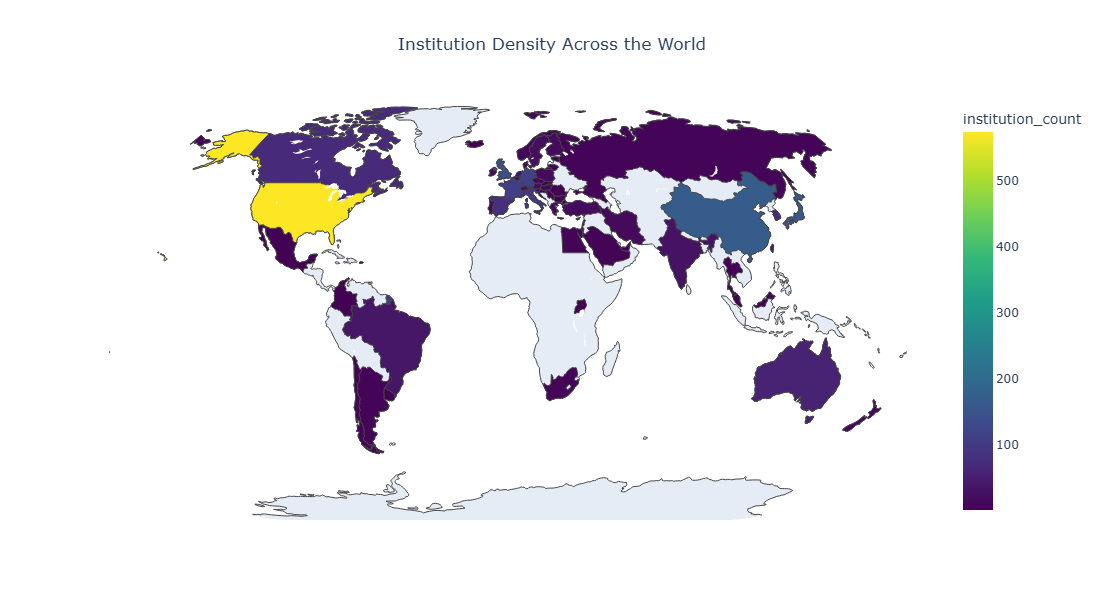

In [234]:
import plotly.express as px
import pandas as pd

# Aggregate data: Count institutions per country
country_counts = cwur_world_merged.groupby('country').size().reset_index(name='institution_count')

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="country",  # Column with country names
    locationmode="country names",  # Match country names to Plotly's map
    color="institution_count",  # Color intensity based on institution count
    title="Institution Density Across the World",
    color_continuous_scale="Viridis",  # Choose a color scale
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, projection_type="natural earth"),
    title_x=0.5,
    width=1000,  # Set the width of the figure
    height=600,  # Set the height of the figure
)

fig.show()

## 8. More in-depth Analysis

### 8.1.1 Correlation Correlation Analysis for variables; Generarte Heatmap

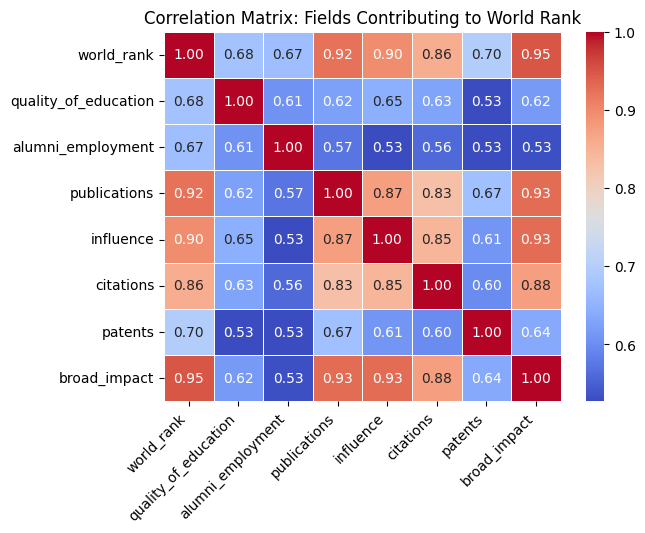

In [167]:
# Select relevant columns
correlation_metrics = cwur_world_merged[['world_rank', 'quality_of_education', 'alumni_employment', 
                                         'publications', 'influence', 'citations', 'patents', 'broad_impact']]
# Correlation heatmap
corr_matrix = correlation_metrics.corr() # computes the Pearson correlation coefficient
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: Fields Contributing to World Rank')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.show()

### 8.1.2 Top contributors to world_rank from correlation analysis

In [168]:
# Identify top contributors to 'world_rank'
top_contributors = corr_matrix['world_rank'].drop('world_rank').sort_values()

print("Top Contributing Fields to World Rank (Correlation):")
print(top_contributors)

Top Contributing Fields to World Rank (Correlation):
alumni_employment       0.668529
quality_of_education    0.676166
patents                 0.698214
citations               0.856573
influence               0.895871
publications            0.923037
broad_impact            0.949707
Name: world_rank, dtype: float64


### 8.2 Pairplot Analysis: 
    A) Scatter plot for all pairwise combinations of the selected variables
    B) Kernel density estimates (KDEs) on the diagonal to show the distribution of each variable

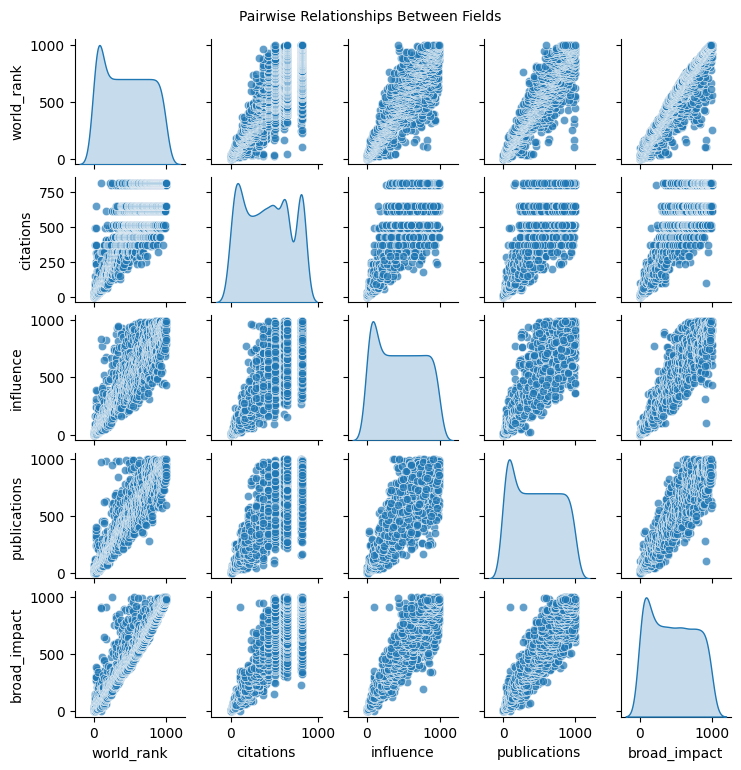

In [173]:
# Pairplot of selected features contributing to world rank more comparing to other variables
sns.pairplot(cwur_world_merged, 
             vars=['world_rank', 'citations', 'influence', 'publications', 'broad_impact'],
             diag_kind='kde', 
             plot_kws={'alpha': 0.7},
             height=1.5)
plt.suptitle('Pairwise Relationships Between Fields', y=1.02, fontsize=10)
plt.show()


### 8.3 Feature Importance Using Liner Regression

RMSE: 85.89
Feature Importance (Linear Regression):
                Feature  Importance
4          broad_impact  210.453805
1     alumni_employment   54.181877
2          publications   36.511984
5               patents   23.688160
0  quality_of_education   10.024113
3             citations   -5.324048


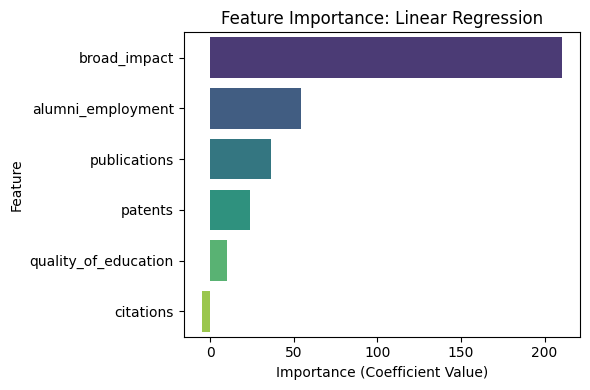

In [186]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data for regression
X = cwur_world_merged[['quality_of_education', 'alumni_employment',
                       'publications', 'citations', 'broad_impact', 'patents']]
y = cwur_world_merged['world_rank']

# Feature scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', key=abs, ascending=False)

print("Feature Importance (Linear Regression):")
print(feature_importance)

# Bar plot for feature importance
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Feature', palette='viridis')
plt.title('Feature Importance: Linear Regression', fontsize=12)
plt.xlabel('Importance (Coefficient Value)', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.tight_layout()
plt.show()

### 8.4 Analysis using Random Forest

RMSE: 47.52

Feature Importance (Random Forest):
                Feature  Importance
4          broad_impact    0.874783
1     alumni_employment    0.053073
2          publications    0.038393
5               patents    0.017436
3             citations    0.010087
0  quality_of_education    0.006229


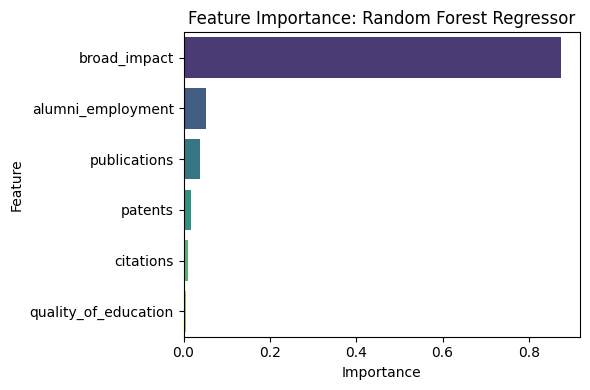

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for regression
X = cwur_world_merged[['quality_of_education', 'alumni_employment', 
                       'publications', 'citations', 'broad_impact', 'patents']]
y = cwur_world_merged['world_rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # Using 100 trees as default
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Extract feature importances
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("RMSE:", round(rmse, 2))
print("\nFeature Importance (Random Forest):")
print(rf_importance)

# Bar plot for feature importance
plt.figure(figsize=(6, 4))
sns.barplot(data=rf_importance, x='Importance', y='Feature', hue='Feature', palette='viridis')
plt.title('Feature Importance: Random Forest Regressor', fontsize=12)
plt.xlabel('Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.tight_layout()
plt.show()

### 8.5 K-Means Clustering analysis

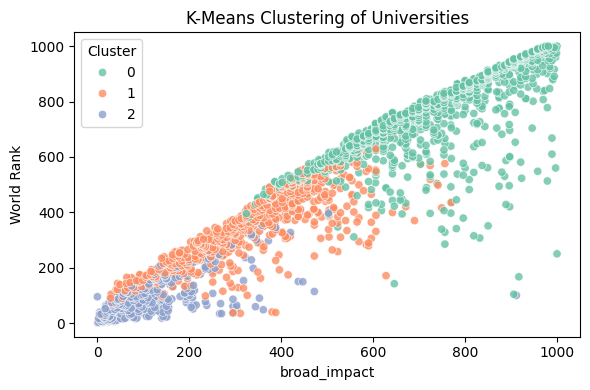

In [191]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
cwur_world_merged['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cwur_world_merged, x='broad_impact', y='world_rank',
                hue='Cluster', palette='Set2', alpha=0.8)
plt.title('K-Means Clustering of Universities', fontsize=12)
plt.xlabel('broad_impact', fontsize=10)
plt.ylabel('World Rank', fontsize=10)
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()


# Processing on education_expenditure Dataset

## 9. Preprocessing of Data

## 9.1 Check the dataset information

In [196]:
education_expenditure.info()
print(education_expenditure.isnull().sum())
education_expenditure.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  333 non-null    object 
 1   institute_type           333 non-null    object 
 2   direct_expenditure_type  333 non-null    object 
 3   1995                     94 non-null     float64
 4   2000                     99 non-null     float64
 5   2005                     106 non-null    float64
 6   2009                     103 non-null    float64
 7   2010                     101 non-null    float64
 8   2011                     282 non-null    float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB
country                      0
institute_type               0
direct_expenditure_type      0
1995                       239
2000                       234
2005                       227
2009                       230
2010                       232
2

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


## 9.2. Extract all year columns using regex

In [200]:
# Extract year columns dynamically
year_column = education_expenditure.columns[education_expenditure.columns.str.match(r'^\d{4}$')]
print(year_column)

Index(['1995', '2000', '2005', '2009', '2010', '2011'], dtype='object')


## 9.3. Function to handle missing value

Fill missing value of different direct_expenditure_type (Public, Private, Total).
Many values are missing from either of three types. Based on the available data, I have observed that contribution to Public is more than Private and it is also varying from 80% to 95%. Henece I have made one assumption that if value is missing than 95% contribution will be considered for Public and 5% for Private. Total will be Public+Private.

Based on the above locgic, I have imputed all the missing values.

In [203]:
def fill_missing_value_education_expenditure(group):

    # Loop through all the columns to extract relevant rows from column 'direct_expenditure_type'
    for year in year_column:
        public_val = group.loc[group['direct_expenditure_type'] == 'Public', year].squeeze()
        private_val = group.loc[group['direct_expenditure_type'] == 'Private', year].squeeze()
        total_val = group.loc[group['direct_expenditure_type'] == 'Total', year].squeeze()

        # fill missing value: considering 95% Public and 5% Private contribution

        # Case 1: Total is present, Public and Private are missing
        if not pd.isna(total_val) and pd.isna(public_val) and pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_val * 0.95
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_val * 0.05

        # Case 2: Public is present, Private and Total are missing
        elif not pd.isna(public_val) and pd.isna(private_val) and pd.isna(total_val):
            total_calculate = public_val / 0.95
            group.loc[group['direct_expenditure_type'] == 'Total', year] = total_calculate
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_calculate * 0.05

        # Case 3: Private is available, Public and Total are missing
        elif not pd.isna(private_val) and pd.isna(public_val) and pd.isna(total_val):
            total_calculate = private_val / 0.05
            group.loc[group['direct_expenditure_type'] == 'Total', year] = total_calculate
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_calculate * 0.95

        # Case 4: Two values are present
        if pd.isna(total_val) and not pd.isna(public_val) and not pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Total', year] = public_val + private_val
        elif pd.isna(private_val) and not pd.isna(total_val) and not pd.isna(public_val):
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_val - public_val
        elif pd.isna(public_val) and not pd.isna(total_val) and not pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_val - private_val

    # Now handle Case 5: All three values are missing
    for year in year_column:
        public_val = group.loc[group['direct_expenditure_type'] == 'Public', year].squeeze()
        private_val = group.loc[group['direct_expenditure_type'] == 'Private', year].squeeze()
        total_val = group.loc[group['direct_expenditure_type'] == 'Total', year].squeeze()

        # Case 5: All three values are missing
        if pd.isna(total_val) and pd.isna(public_val) and pd.isna(private_val):
            # Calculate averages from available years within the group
            avg_pub = group.loc[group['direct_expenditure_type'] == 'Public', year_column].mean(axis=1).squeeze()
            avg_pri = group.loc[group['direct_expenditure_type'] == 'Private', year_column].mean(axis=1).squeeze()
            avg_tot = avg_pub + avg_pri

            # Fill values using historical averages
            group.loc[group['direct_expenditure_type'] == 'Public', year] = avg_pub if not pd.isna(avg_pub) else 0.95 * avg_tot
            group.loc[group['direct_expenditure_type'] == 'Private', year] = avg_pri if not pd.isna(avg_pri) else 0.05 * avg_tot
            group.loc[group['direct_expenditure_type'] == 'Total', year] =  avg_tot
            
    return group

education_expenditure = education_expenditure.groupby(
    ['country', 'institute_type'], group_keys=False
).apply(fill_missing_value_education_expenditure)

print(education_expenditure)

                  country                  institute_type  \
0            OECD Average               All Institutions    
1               Australia               All Institutions    
2                 Austria               All Institutions    
3                 Belgium               All Institutions    
4                  Canada               All Institutions    
..                    ...                             ...   
328                Turkey  Higher Education Institutions    
329        United Kingdom  Higher Education Institutions    
330         United States  Higher Education Institutions    
331                Brazil  Higher Education Institutions    
332    Russian Federation  Higher Education Institutions    

    direct_expenditure_type      1995      2000      2005      2009      2010  \
0                    Public  4.900000  4.900000  5.000000  5.400000  5.400000   
1                    Public  4.500000  4.600000  4.300000  4.500000  4.600000   
2                    Pub

C:\Users\Dinesh Thakur\AppData\Local\Temp\ipykernel_18364\3008473700.py:58: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### 9.4. Melt the years into one column for better analysis

In [205]:
edu_expend = pd.melt(education_expenditure,
                  id_vars=['country', 'institute_type', 'direct_expenditure_type'],
                  value_vars=year_column,  # year columns to melt
                  var_name='year',  # Name for the 'melted' columns
                  value_name='expenditure_value'  # Name for the values in melted columns
                 )
edu_expend['expenditure_value'] = edu_expend['expenditure_value'].round(2)
print(edu_expend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  1998 non-null   object 
 1   institute_type           1998 non-null   object 
 2   direct_expenditure_type  1998 non-null   object 
 3   year                     1998 non-null   object 
 4   expenditure_value        1998 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.2+ KB
None


In [206]:
print(edu_expend)

                   country                  institute_type  \
0             OECD Average               All Institutions    
1                Australia               All Institutions    
2                  Austria               All Institutions    
3                  Belgium               All Institutions    
4                   Canada               All Institutions    
...                    ...                             ...   
1993                Turkey  Higher Education Institutions    
1994        United Kingdom  Higher Education Institutions    
1995         United States  Higher Education Institutions    
1996                Brazil  Higher Education Institutions    
1997    Russian Federation  Higher Education Institutions    

     direct_expenditure_type  year  expenditure_value  
0                     Public  1995               4.90  
1                     Public  1995               4.50  
2                     Public  1995               5.30  
3                     Public  1

## 10. Visualize the data

### 10.1 Average expenditure by year

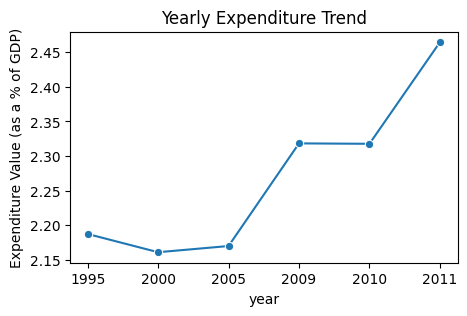

In [213]:
yearly_trend = edu_expend.groupby('year')['expenditure_value'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.lineplot(data=yearly_trend, x='year', y='expenditure_value', marker='o')
plt.title("Yearly Expenditure Trend")
plt.ylabel("Expenditure Value (as a % of GDP)")
plt.show()

### 10.2 Country-Specific Trends for All Countries

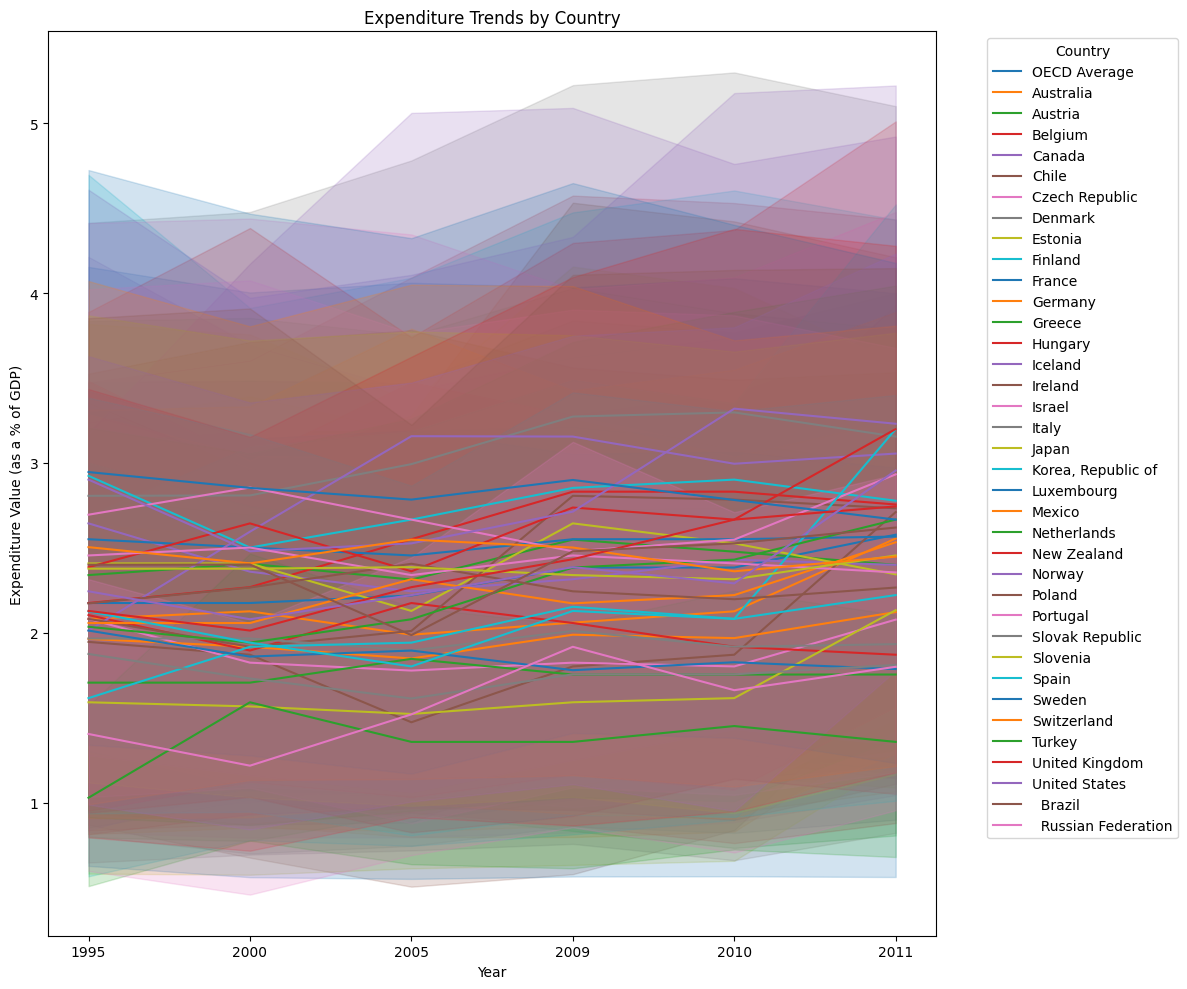

In [232]:
# Country-Specific Trends for All Countries

# Take unique countries in the dataset
countries = edu_expend['country'].unique()

plt.figure(figsize=(12, 10))
for country in countries:
    country_data = edu_expend[edu_expend['country'] == country]
    sns.lineplot(data=country_data, x='year', y='expenditure_value', label=country)

plt.title("Expenditure Trends by Country")
plt.xlabel("Year")
plt.ylabel("Expenditure Value (as a % of GDP)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()

### 10.3 Trends for selected countries

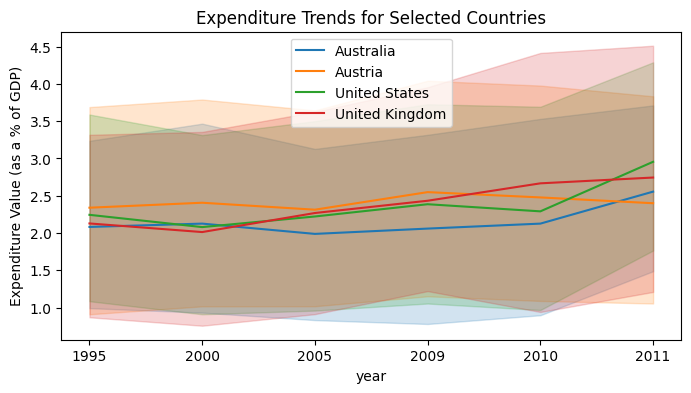

In [233]:
# Plot trends for selected countries
countries = ['Australia', 'Austria', 'United States', 'United Kingdom']
plt.figure(figsize=(8, 4))
for country in countries:
    country_data = edu_expend[edu_expend['country'] == country]
    sns.lineplot(data=country_data, x='year', y='expenditure_value', label=country)
plt.title("Expenditure Trends for Selected Countries")
plt.ylabel("Expenditure Value (as a % of GDP)")
plt.legend()
plt.show()

### 10.4 Public vs. Total Expenditure

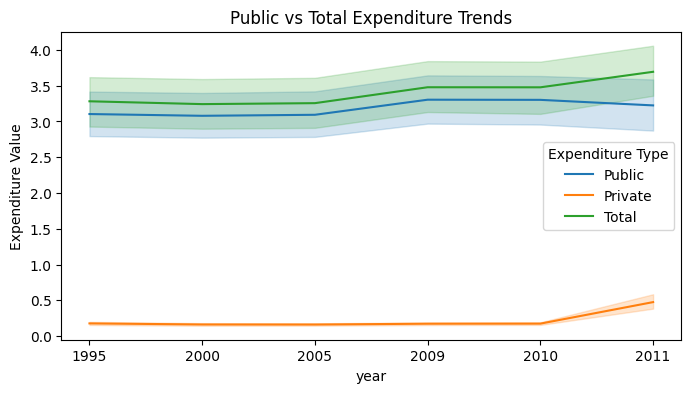

In [219]:
# Public vs. Total Expenditure
public_vs_total = edu_expend[edu_expend['direct_expenditure_type'].isin(['Public', 'Total', 'Private'])]
plt.figure(figsize=(8, 4))
sns.lineplot(data=public_vs_total, x='year', y='expenditure_value', hue='direct_expenditure_type')
plt.title("Public vs Total Expenditure Trends")
plt.ylabel("Expenditure Value")
plt.legend(title="Expenditure Type")
plt.show()

### 10.5 Institution Type Comparison

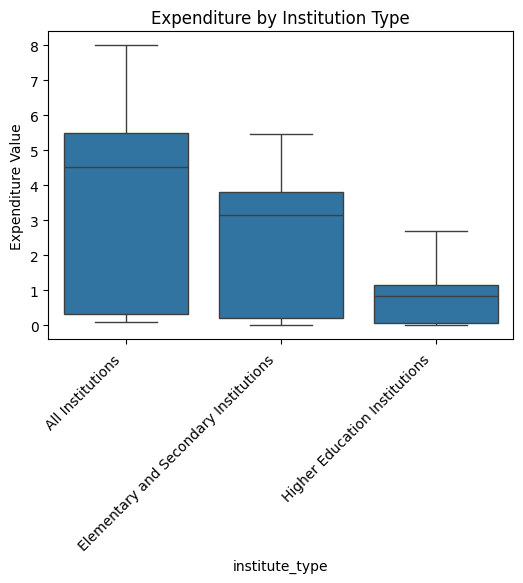

In [227]:
# Institution Type Comparison
plt.figure(figsize=(6, 4))
sns.boxplot(data=edu_expend, x='institute_type', y='expenditure_value')
plt.title("Expenditure by Institution Type")
plt.ylabel("Expenditure Value")
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.show()

### 10.6 Average Expenditure for Top and Bottom 5 Countries

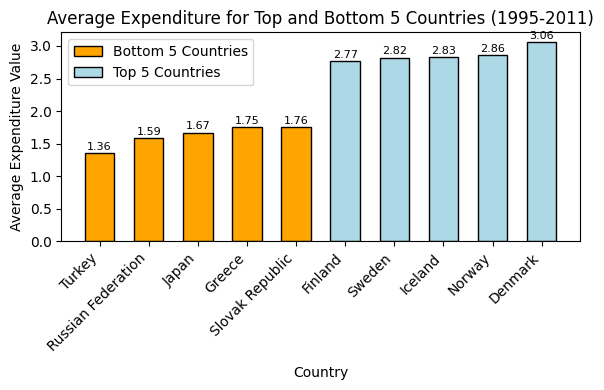

In [231]:
# Calculate the average expenditure for each country
avg_expenditure = edu_expend.groupby('country')['expenditure_value'].mean().sort_values()

# Get the top and bottom 5 countries
top_countries = avg_expenditure.tail(5)
bottom_countries = avg_expenditure.head(5)

# Combine data for top and bottom 5 countries, ensuring they are grouped
grouped_data = pd.concat([bottom_countries, top_countries])
labels = grouped_data.index
values = grouped_data.values

# Create the bar chart
plt.figure(figsize=(6, 4))

# Plot bars with distinct colors for each group
colors = ['orange'] * 5 + ['lightblue'] * 5  # Orange for bottom 5, Blue for top 5
bars = plt.bar(labels, values, color=colors, width=0.6, edgecolor='black')

# Add title, labels, and legend
plt.title("Average Expenditure for Top and Bottom 5 Countries (1995-2011)", fontsize=12)
plt.xlabel("Country", fontsize=10)
plt.ylabel("Average Expenditure Value", fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(handles=[bars[0], bars[-1]], labels=["Bottom 5 Countries", "Top 5 Countries"], loc="upper left")

# Add value annotations above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,f"{bar.get_height():.2f}", ha='center', fontsize=8)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()